In [2]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib widget
%load_ext autoreload
%autoreload 2
%run phasedecoder907.ipynb
from src.folder_handler import *
from src.cort_processor import CortProcessor
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import math
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from scipy import signal




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


In [4]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_729_session.pkl', 'rb') as inp:
    session729 = pickle.load(inp)
rates729 = session729.data['rates']
angles729 = session729.data['angles']
coords729 = session729.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_818_session.pkl', 'rb') as inp:
    session818 = pickle.load(inp)
rates818 = session818.data['rates']
angles818 = session818.data['angles']
coords818 = session818.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_825_session.pkl', 'rb') as inp:
    session825 = pickle.load(inp)
rates825 = session825.data['rates']
angles825 = session825.data['angles']
coords825 = session825.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_901_session.pkl', 'rb') as inp:
    session901 = pickle.load(inp)
rates901 = session901.data['rates']
angles901 = session901.data['angles']
coords901 = session901.data['coords']

In [5]:
arctans729, phase_list729, H_sin729, H_cos729, VAF729, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates729, angles729)
tsf729 = np.linspace(0, (phase_list729.shape[0]*50)/1000,phase_list729.shape[0])

arctans818, phase_list818, H_sin818, H_cos818, VAF818, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates818, angles818)
tsf818 = np.linspace(0, (phase_list818.shape[0]*50)/1000,phase_list818.shape[0])

arctans825, phase_list825, H_sin825, H_cos825, VAF825, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates825, angles825)
tsf825 = np.linspace(0, (phase_list825.shape[0]*50)/1000,phase_list825.shape[0])

arctans901, phase_list901, H_sin901, H_cos901, VAF901, sin_array, cos_array, predicted_sin, predicted_cos = phase_train(rates901, angles901)
tsf901 = np.linspace(0, (phase_list901.shape[0]*50)/1000,phase_list901.shape[0])

In [6]:
limbfoot_roll729 = align_to_hind(phase_list729, 3)
print(limbfoot_roll729)
limbfoot_roll818 = align_to_hind(phase_list818, 3)
print(limbfoot_roll818)
limbfoot_roll825 = align_to_hind(phase_list825, 3)
print(limbfoot_roll825)
limbfoot_roll901 = align_to_hind(phase_list901, 3)
print(limbfoot_roll901)

[ 5. -3.  2.  0. -3. -4. -3.]
[ 4. -3.  1.  0. -3. -4. -3.]
[ 5. -3. -6.  0. -3. -3. -3.]
[ 5. -3.  1.  0. -3. -3. -3.]


In [7]:
knee_roll729 = align_to_hind(phase_list729, 1)
print(knee_roll729)
knee_roll818 = align_to_hind(phase_list818, 1)
print(knee_roll818)
knee_roll825 = align_to_hind(phase_list825, 1)
print(knee_roll825)
knee_roll901 = align_to_hind(phase_list901, 1)
print(knee_roll901)

[9. 0. 6. 5. 2. 1. 2.]
[9. 0. 5. 5. 2. 1. 2.]
[ 9.  0. -2.  5.  2.  1.  2.]
[9. 0. 6. 5. 2. 1. 2.]


In [11]:
def best_hindlimb_match(phase_list, roll, AOI):
    rank_list = []
    for i in range(4,7):
        mate = np.roll(phase_list[:,i],int(roll[i]))
        target_phase = phase_list[:,AOI]
        phase_synchrony = 1-np.sin(np.abs(target_phase-mate)/2)
        rank = np.mean(phase_synchrony)
        rank_list.append(rank)
    print(rank_list)
    best_index = max(range(len(rank_list)), key=rank_list.__getitem__)+4
    return best_index


In [12]:
best_limbfoot_match729 = best_limbfoot_match(phase_list729, limbfoot_roll729, 3)
print(best_limbfoot_match729)

[0.9716715890655331, 0.9832642966596761, 0.9658105875982833]
5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
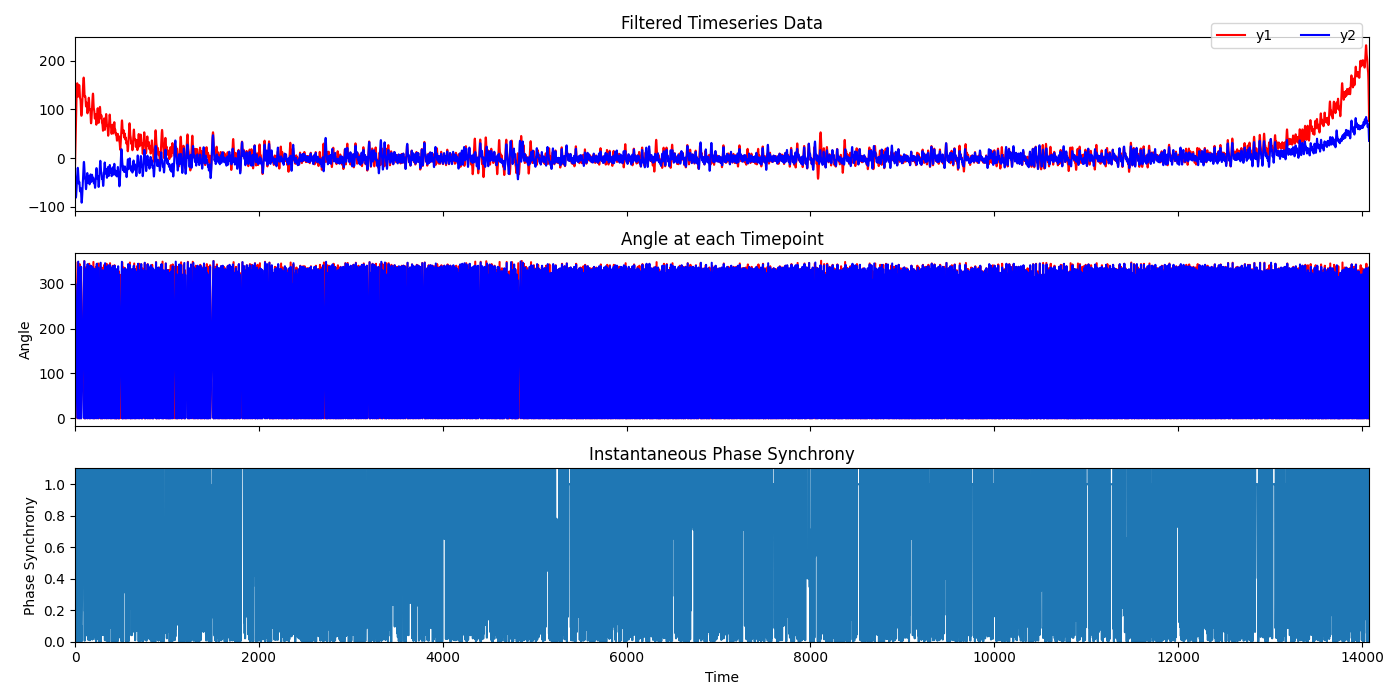

In [17]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = phase_list729[:,3]
d2 = np.roll(phase_list729[:,6],int(limbfoot_roll729[6]))
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

# al1 = np.angle(hilbert(y1),deg=False)
# al2 = np.angle(hilbert(y2),deg=False)
al1 = phase_list729[:,3]
al2 = np.roll(phase_list729[:,6],int(limbfoot_roll729[6]))
# al2 = phase_list729[:,6]


phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
# phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()


In [19]:
print(np.mean(phase_synchrony))

0.981376039649146
